### Dont edit this



In [1]:
import requests
import matplotlib.pylab as plt

# Helper
def name_to_b58(hotspot_name):
    return list(filter(lambda x: '-'.join(x['name'].lower().split(' ')) == hotspot_name,
                       HOTSPOTS))[0]['address']

def b58_to_name(hb58):
    return list(filter(lambda x: x['address'] == hb58, HOTSPOTS))[0]['name']

def get_witnesses_by_name(hname):
    hotspot = name_to_b58(hname)

    witness_resp = requests.get('{}/witnesses/{}'.format(API, hotspot))
    assert(witness_resp.status_code == 200)

    witnesses = witness_resp.json()['data']
    return witnesses

def get_witnesses(hb58):
    witness_resp = requests.get('{}/witnesses/{}'.format(API, hb58))
    assert(witness_resp.status_code == 200)

    witnesses = witness_resp.json()['data']
    return witnesses

def get_path(challenge_id):
    challenge_resp = requests.get('{}/challenges/{}'.format(API, challenge_id))
    assert(challenge_resp.status_code == 200)
    
    path = challenge_resp.json()['data']['pathElements']
    addresses = [p['address'] for p in path]
    return addresses

def plot_single_witness_by_name(hname, wname):
    witnesses = get_witnesses_by_name(hname)
    for witness in witnesses:
        if '-'.join(witness['name'].lower().split(' ')) == wname:
            hist = witness['hist']
            address = witness['address']
            w_name = witness['name']
            print("{} has witnessed {} at these RSSI values".format(wname, hname))
            # print(w_name)
            # print(hist)
            plt.bar(range(len(hist)), list(hist.values()), align='center')
            plt.xticks(range(len(hist)), list(hist.keys()))
            plt.title('Histogram')
            plt.xlabel('Buckets')
            plt.ylabel('Counts')
            plt.show()
    return

def plot_single_witness(hb58, wb58):
    witnesses = get_witnesses(hb58)
    for witness in witnesses:
        if witness['address'] == wb58:
            hist = witness['hist']
            address = witness['address']
            w_name = witness['name']
            print("{} has witnessed {} at these RSSI values".format(w_name, b58_to_name(hb58)))
            # print(w_name)
            print(hist)
            plt.bar(range(len(hist)), list(hist.values()), align='center')
            plt.xticks(range(len(hist)), list(hist.keys()))
            plt.title('Histogram')
            plt.xlabel('Buckets')
            plt.ylabel('Counts')
            plt.show()
    return

# Constants, don't touch this
API = 'https://explorer.helium.foundation/api'
hotspots_resp = requests.get("{}/hotspots".format(API))
assert(hotspots_resp.status_code == 200)
HOTSPOTS = hotspots_resp.json()['data']

### Edit challenge_id to get path RSSI histograms

In [44]:
challenge_id = 1110327

In [45]:
path_b58_addrs = get_path(challenge_id)

In [47]:
path_b58_addrs

['112m48zP6UC1yCZkBtUn15vRUk38rPBqJQeoZdZvPHjL4a88uxkc',
 '112TYyiHFxgGa5oC7wuuwfXyKhWh8oeA5HpRKJvwMCUwBHCVjwgk',
 '112CKyEQZ5VqfxxdD2VefrvDHsufQYt1uchs2oaXF14CBCCn44XE',
 '112NpqyB7Jq3SrmG8tbMwW6rwic8ftpkDFPsechdRzuLE59QSNmY',
 '1125zynzFS2F1snxjbzattnkTjVGhuJDutGhyzrqtfQZpV78WjKE',
 '11a9u2Dkh3LjkbXYiCH3dendQySrdhLGyYWJYUcLMspESnhczsk',
 '1124SaAEM5rAM5yaktUDtZwLWoVBosCQE7sz4MdjomUxENXSAUtY']

In [17]:
path_names = [b58_to_name(i) for i in path_b58_addrs]
path_names

['Joyous Foggy Snail',
 'Joyful Rose Wallaby',
 'Ripe Porcelain Stallion',
 'Wonderful Ceramic Wren',
 'Faithful Charcoal Seal',
 'Bubbly Pastel Ant',
 'Unique Brick Guppy']

In [4]:
def plot_path_rssi_hist(path):
  path_length = len(path)
  i = 0
  while i < path_length:
      if i == path_length - 1:
          print('done')
      else:
          h = path[i]
          w = path[i + 1]
          plot_single_witness(h, w)
      i += 1
  return

Joyful Rose Wallaby has witnessed Joyous Foggy Snail at these RSSI values
{'-132': 0, '-123': 95, '-115': 72, '-106': 0, '-98': 0, '-90': 0, '-81': 0, '-73': 0, '-64': 0, '-56': 0, '28': 13}


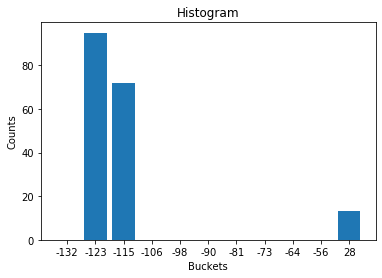

Ripe Porcelain Stallion has witnessed Joyful Rose Wallaby at these RSSI values
{'-132': 0, '-123': 0, '-114': 63, '-105': 1, '-96': 0, '-87': 0, '-78': 0, '-69': 0, '-61': 0, '-52': 0, '28': 5}


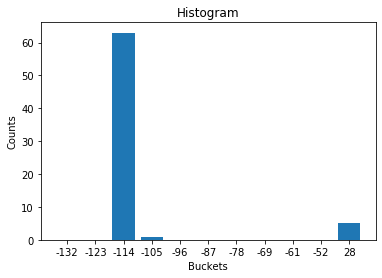

Wonderful Ceramic Wren has witnessed Ripe Porcelain Stallion at these RSSI values
{'-132': 0, '-122': 0, '-112': 87, '-103': 0, '-93': 1, '-84': 0, '-74': 0, '-64': 0, '-55': 0, '-45': 0, '28': 2}


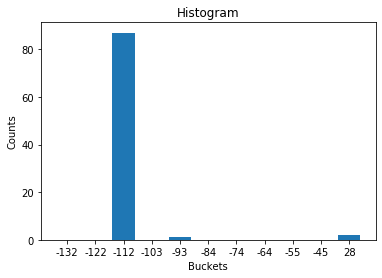

Faithful Charcoal Seal has witnessed Wonderful Ceramic Wren at these RSSI values
{'-132': 0, '-123': 0, '-114': 0, '-105': 207, '-96': 13, '-87': 0, '-78': 0, '-69': 0, '-61': 0, '-52': 0, '28': 0}


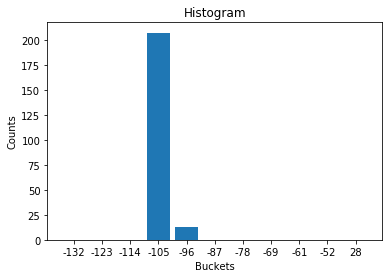

Bubbly Pastel Ant has witnessed Faithful Charcoal Seal at these RSSI values
{'-132': 0, '-124': 4, '-116': 67, '-108': 14, '-100': 0, '-92': 0, '-84': 0, '-76': 0, '-68': 5, '-61': 1, '28': 55}


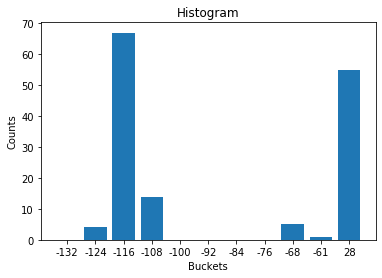

Unique Brick Guppy has witnessed Bubbly Pastel Ant at these RSSI values
{'-132': 0, '-124': 0, '-116': 47, '-108': 25, '-100': 0, '-93': 0, '-85': 0, '-77': 0, '-69': 0, '-62': 0, '28': 51}


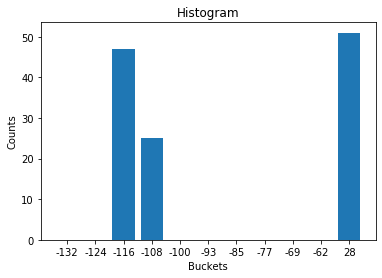

done


In [5]:
plot_path_rssi_hist(path_b58_addrs)

### Edit hotspot_name and witness_name to get RSSI hist

In [6]:
# For example
hotspot_name = "skinny-fleece-mockingbird"
witness_name = "skinny-blue-rat"

skinny-blue-rat has witnessed skinny-fleece-mockingbird at these RSSI values


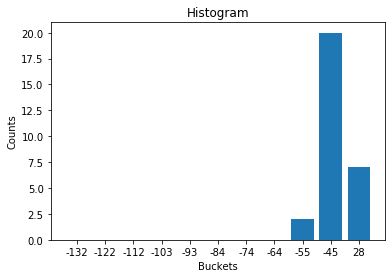

In [7]:
plot_single_witness_by_name(hotspot_name, witness_name)

### For getting ALL witness RSSIs

In [18]:
path_names

['Joyous Foggy Snail',
 'Joyful Rose Wallaby',
 'Ripe Porcelain Stallion',
 'Wonderful Ceramic Wren',
 'Faithful Charcoal Seal',
 'Bubbly Pastel Ant',
 'Unique Brick Guppy']

{'-132': 0, '-124': 0, '-116': 0, '-108': 0, '-100': 37, '-92': 44, '-84': 0, '-76': 0, '-68': 0, '-60': 6, '28': 54}


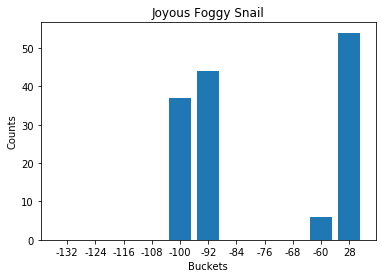

{'-132': 0, '-124': 0, '-116': 49, '-109': 28, '-101': 0, '-93': 0, '-86': 0, '-78': 0, '-70': 0, '-63': 0, '28': 0}


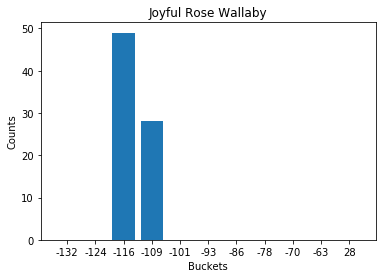

{'-132': 0, '-124': 0, '-116': 0, '-108': 0, '-100': 61, '-92': 13, '-84': 0, '-76': 0, '-68': 0, '-60': 0, '28': 4}


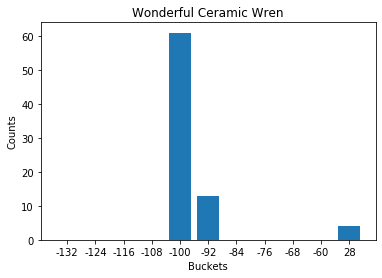

{'-132': 0, '-124': 4, '-116': 34, '-108': 0, '-100': 0, '-92': 1, '-84': 0, '-76': 0, '-68': 0, '-60': 0, '28': 3}


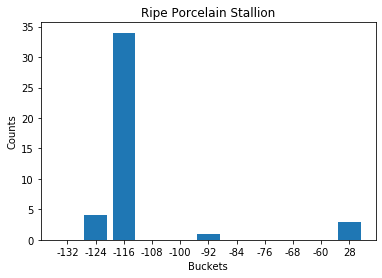

{'-132': 0, '-124': 0, '-116': 55, '-108': 34, '-100': 0, '-92': 0, '-84': 0, '-76': 0, '-68': 3, '-61': 0, '28': 51}


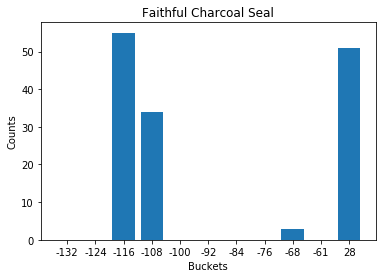

{'-132': 0, '-124': 0, '-116': 47, '-108': 26, '-100': 0, '-93': 0, '-85': 0, '-77': 0, '-69': 0, '-62': 0, '28': 51}


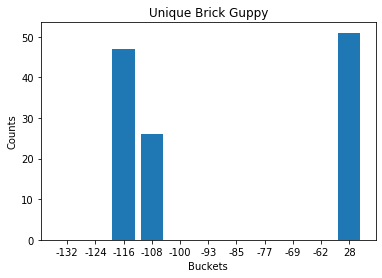

{'-132': 0, '-124': 0, '-116': 0, '-109': 38, '-101': 0, '-93': 0, '-86': 0, '-78': 0, '-70': 0, '-63': 0, '28': 2}


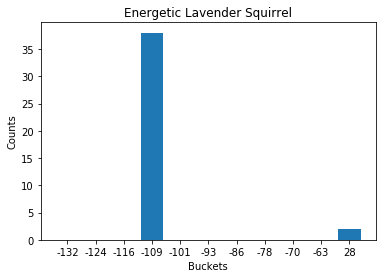

In [30]:
## Comment out to see all the values

hotspot_name = "bubbly-pastel-ant"
witnesses = get_witnesses_by_name(hotspot_name)

for w in witnesses:
    hist = w['hist']
    address = w['address']
    name = w['name']
    print(hist)
    plt.bar(range(len(hist)), list(hist.values()), align='center')
    plt.xticks(range(len(hist)), list(hist.keys()))
    plt.title(name)
    plt.xlabel('Buckets')
    plt.ylabel('Counts')
    plt.show()

In [22]:
x = {'-132': 0, '-124': 0, '-116': 0, '-109': 38, '-101': 0, '-93': 0, '-86': 0, '-78': 0, '-70': 0, '-63': 0, '28': 2}
sum(x.values())

40

### Edit block height to inspect txns

In [9]:
BLOCK_HEIGHT = 165691

In [10]:
transactions_resp = requests.get("{}/blocks/{}/transactions".format(API, BLOCK_HEIGHT))
assert(transactions_resp.status_code == 200)

In [11]:
def txn_breakdown(txn_resp):
    txns = txn_resp.json()['data']
    poc_receipt_txns = [t for t in txns if t['type'] == 'poc_receipts']
    poc_req_txns = [t for t in txns if t['type'] == 'poc_request']
    other_txns = [t for t in txns if t['type'] not in ['poc_receipts', 'poc_request']]

    print("block_height: {}, total_txns: {}".format(BLOCK_HEIGHT, len(txns)))
    print("block_height: {}, total_poc_receipts: {}".format(BLOCK_HEIGHT, len(poc_receipt_txns)))
    print("block_height: {}, total_poc_requests: {}".format(BLOCK_HEIGHT, len(poc_req_txns)))
    print("block_height: {}, other_txns: {}".format(BLOCK_HEIGHT, len(other_txns)))

In [12]:
txn_breakdown(transactions_resp)

block_height: 165691, total_txns: 101
block_height: 165691, total_poc_receipts: 45
block_height: 165691, total_poc_requests: 56
block_height: 165691, other_txns: 0


In [41]:
data = {'w1': {'tot': 141, 'good': 87, 'bad': 54},
 'w2': {'tot': 77, 'good': 77, 'bad': 0},
 'w3': {'tot': 78, 'good': 74, 'bad': 4},
 'w4': {'tot': 42, 'good': 39, 'bad': 3},
 'w5': {'tot': 143, 'good': 92, 'bad': 51},
 'w6': {'tot': 124, 'good': 73, 'bad': 51},
 'w7': {'tot': 40, 'good': 38, 'bad': 2}
}

In [42]:
data

{'w1': {'tot': 141, 'good': 87, 'bad': 54},
 'w2': {'tot': 77, 'good': 77, 'bad': 0},
 'w3': {'tot': 78, 'good': 74, 'bad': 4},
 'w4': {'tot': 42, 'good': 39, 'bad': 3},
 'w5': {'tot': 143, 'good': 92, 'bad': 51},
 'w6': {'tot': 124, 'good': 73, 'bad': 51},
 'w7': {'tot': 40, 'good': 38, 'bad': 2}}

In [32]:
tot = [141, 77, 78, 42, 143, 124, 40]

In [34]:
[1 - i/sum(tot) for i in tot]

[0.7813953488372093,
 0.8806201550387597,
 0.8790697674418605,
 0.9348837209302325,
 0.7782945736434108,
 0.8077519379844962,
 0.937984496124031]